## Naive Bayes classifier for multinomial models-NLP-Sentiment Analysis of Amazon reviews for JBL Speaker

In this notebook, the reviews from Amazon on JBL Speaker were analyzed. Different machine learning algorithems wre used to perform NLP analysis on the review titles as well as review texts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import nltk
import re
%matplotlib inline

Reading the JBLcleaned sqlite file:

In [31]:
#reading the sqlite file and making a df from the data
con = sqlite3.connect("Amazon.sqlite")
df = pd.read_sql_query("SELECT * from JLBcleaned", con)

In [32]:
df.head()

,rating,date,location,color,review_title,review,comment,feedback,awesome,good,length_of_review
0,1.0,January-29-2019,United States,Gray,Buy a Charge 3,The JBL Charge 4 has one giant flaw that frank...,11,1,0,0,345
1,3.0,December-12-2018,United States,Black,JBL could make the Charger4 better BUT nop the...,Too bad JBL lower the sound quality on the cha...,3,1,0,1,238
2,5.0,October-26-2018,United States,Black,Sounds great and has plenty of colume,I've been using a JBL Flip 2 for the past coup...,1,1,1,1,531
3,5.0,June-3-2019,United States,Gray,In depth review for jbl charge 4,The JBL charge 4 is a great product. I found i...,2,1,1,1,2636
4,4.0,December-5-2018,United States,Red,Awesome Sound! We'll see how long it lasts!,Great build quality.Great sound!Does not autom...,1,1,0,1,614


Here the most frequenctly repeated words in reviews will be retreived.

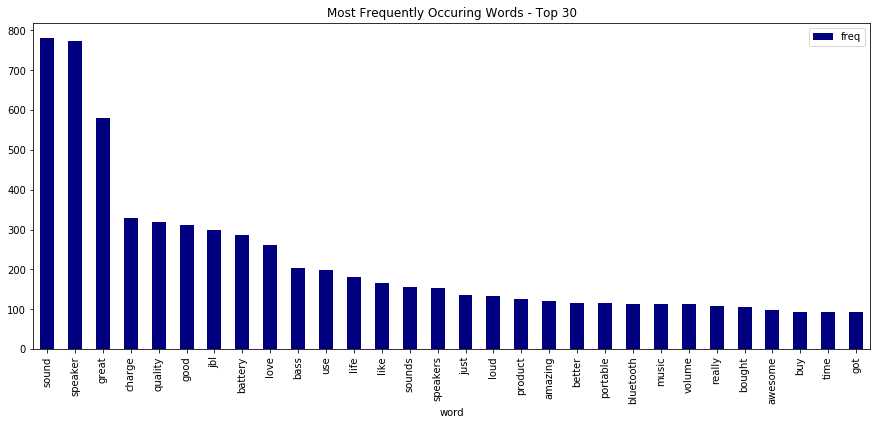

In [5]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.review) #learn a vocabulary
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', color='navy', figsize=(15, 6))
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()

### Machine Learning:

##### Naive Bayes classifier for multinomial models

Here we will choose different features to train our multinomial model and evaluate its performance using different features in the dataset:

Selecting the coloumns (features) that we need:

In [33]:
df = df[['rating', 'awesome','good', 'color', 'feedback', 'review_title', 'review']]

Determining the counts of the values for each feature to be predicted:

In [7]:
import collections
collections.Counter(df['rating'])

Counter({1.0: 100, 3.0: 60, 5.0: 1333, 4.0: 123, 2.0: 35})

In [8]:
import collections
collections.Counter(df['awesome'])

Counter({0: 318, 1: 1333})

In [9]:
import collections
collections.Counter(df['good'])

Counter({0: 135, 1: 1516})

In [10]:
import collections
collections.Counter(df['feedback'])

Counter({1: 27, 0: 1624})

Getting rid of the stop words in review titles:

In [35]:
stop_words = set(nltk.corpus.stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

def cleanpunc(sentence):
    cleaned = re.sub(r"[?|!|\'|\"|#]", r"",sentence)
    cleaned =  re.sub(r"[.|,|)|(|\|/]",r"",cleaned)
    return cleaned.lower()

sentences = df['review_title'].values
reviews = []
for sent in sentences:
    cleaned_sent = cleanpunc(sent)
    sent_arr = cleaned_sent.split()
    output_sent = ''
    for word in sent_arr:
        if word not in stop_words:
            stemmed_word = sno.stem(word)
            output_sent = output_sent + ' ' + stemmed_word
    reviews.append(output_sent)

reviews_text = pd.DataFrame({'reviews': reviews})
df = pd.concat([df,reviews_text], axis=1)
df.head()

,rating,awesome,good,color,feedback,review_title,review,reviews
0,1.0,0,0,Gray,1,Buy a Charge 3,The JBL Charge 4 has one giant flaw that frank...,buy charg 3
1,3.0,0,1,Black,1,JBL could make the Charger4 better BUT nop the...,Too bad JBL lower the sound quality on the cha...,jbl could make charger4 better nop dont
2,5.0,1,1,Black,1,Sounds great and has plenty of colume,I've been using a JBL Flip 2 for the past coup...,sound great plenti colum
3,5.0,1,1,Gray,1,In depth review for jbl charge 4,The JBL charge 4 is a great product. I found i...,depth review jbl charg 4
4,4.0,0,1,Red,1,Awesome Sound! We'll see how long it lasts!,Great build quality.Great sound!Does not autom...,awesom sound well see long last


Getting rid of the stop words in review texts:

In [36]:
stop_words = set(nltk.corpus.stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

def cleanpunc(sentence):
    cleaned = re.sub(r"[?|!|\'|\"|#]", r"",sentence)
    cleaned =  re.sub(r"[.|,|)|(|\|/]",r"",cleaned)
    return cleaned.lower()

sentences = df['review'].values
reviews = []
for sent in sentences:
    cleaned_sent = cleanpunc(sent)
    sent_arr = cleaned_sent.split()
    output_sent = ''
    for word in sent_arr:
        if word not in stop_words:
            stemmed_word = sno.stem(word)
            output_sent = output_sent + ' ' + stemmed_word
    reviews.append(output_sent)

reviews_texts = pd.DataFrame({'review_text': reviews})
df = pd.concat([df,reviews_texts], axis=1)
df.head()

,rating,awesome,good,color,feedback,review_title,review,reviews,review_text
0,1.0,0,0,Gray,1,Buy a Charge 3,The JBL Charge 4 has one giant flaw that frank...,buy charg 3,jbl charg 4 one giant flaw frank make posit b...
1,3.0,0,1,Black,1,JBL could make the Charger4 better BUT nop the...,Too bad JBL lower the sound quality on the cha...,jbl could make charger4 better nop dont,bad jbl lower sound qualiti charger 4 ad 1 sp...
2,5.0,1,1,Black,1,Sounds great and has plenty of colume,I've been using a JBL Flip 2 for the past coup...,sound great plenti colum,ive use jbl flip 2 past coupl year felt confi...
3,5.0,1,1,Gray,1,In depth review for jbl charge 4,The JBL charge 4 is a great product. I found i...,depth review jbl charg 4,jbl charg 4 great product found initi disappo...
4,4.0,0,1,Red,1,Awesome Sound! We'll see how long it lasts!,Great build quality.Great sound!Does not autom...,awesom sound well see long last,great build qualitygreat sounddo automat reco...


### We will select three features each time to perform predictions: 
### 1. feedback, color and reviews(Review_titles):

In [14]:
crf = df[['color', 'feedback', 'reviews']]
from sklearn.utils import resample
data_majority = crf[df.feedback == 1]
data_minority = crf[df.feedback == 0]
data_minority_upsampled = resample(data_minority,
                                   replace=True,n_samples=2500,random_state=123)
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
crffinal = pd.concat([data_upsampled,
                   pd.get_dummies(data_upsampled['color'],sparse=True)], axis=1)

crffinal.shape

crffinal.drop(['color'], axis=1, inplace=True)
crffinal.head()

,feedback,reviews,Black,Black Camo,Blue,Camouflage,Gray,Green,Pink,Red,Sand,Teal,White,Yellow
0,1,buy charg 3,0,0,0,0,1,0,0,0,0,0,0,0
1,1,jbl could make charger4 better nop dont,1,0,0,0,0,0,0,0,0,0,0,0
2,1,sound great plenti colum,1,0,0,0,0,0,0,0,0,0,0,0
3,1,depth review jbl charg 4,0,0,0,0,1,0,0,0,0,0,0,0
4,1,awesom sound well see long last,0,0,0,0,0,0,0,1,0,0,0,0


Vectorizing the review titles:

In [15]:
count_vect = CountVectorizer(ngram_range=(1,2))
final_counts = count_vect.fit_transform(crffinal['reviews'].values)
print(final_counts.get_shape())
print(crffinal.shape)
crffinal.drop(['reviews'],axis=1,inplace=True)

(2527, 2155)
(2527, 14)


In [16]:
rev_df = pd.DataFrame(final_counts.todense(),columns=count_vect.get_feature_names())

In [17]:
rev_df.shape

(2527, 2155)

In [18]:
crffinal.reset_index(inplace=True, drop=True)
crffinal_df = pd.concat([crffinal,rev_df], axis=1)

In [19]:
crffinal_df.shape

(2527, 2168)

##### Seperate dependent and independent Features :

In [20]:
X = crffinal_df.iloc[:,1:].values
y = np.ravel(crffinal_df.iloc[:,0:1].values)

##### Split data into Train and Test:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

##### Training the model with GridSearchCV to find optimal Hyperparameter:

In [22]:
clf = MultinomialNB()
param_disb = { 'alpha': [10**-4,10**-3,10**-2,10**-1,10,1,10**2,10**3,10**4]}
search = GridSearchCV(clf, param_grid=param_disb, cv=5)
search.fit(X_train,y_train)

print(search.best_estimator_)

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)


##### Training and Testing the model with optimal Hyperparameter:

In [23]:
clf = MultinomialNB(alpha=10, class_prior=None, fit_prior=True)
clf. fit(X_train, y_train)
print(confusion_matrix(y_test, clf.predict(X_test)))
print(f"Accuracy Score -> {clf.score(X_test,y_test)}")

[[824   0]
 [ 10   0]]
Accuracy Score -> 0.988009592326139


### 2. rating, color and review_titles (reviews):

In [37]:
rcr = df[['color', 'rating', 'reviews']]
from sklearn.utils import resample
data_majority = rcr[df.rating == 5]
data_minority = rcr[df.rating == 1]
data_minority_upsampled = resample(data_minority,
                                   replace=True,n_samples=2500,random_state=123)
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
rcrfinal = pd.concat([data_upsampled,
                   pd.get_dummies(data_upsampled['color'],sparse=True)], axis=1)

rcrfinal.shape

rcrfinal.drop(['color'], axis=1, inplace=True)
rcrfinal.head()

,rating,reviews,Black,Black Camo,Blue,Camouflage,Gray,Green,Pink,Red,Sand,Teal,White,Yellow
2,5.0,sound great plenti colum,1,0,0,0,0,0,0,0,0,0,0,0
3,5.0,depth review jbl charg 4,0,0,0,0,1,0,0,0,0,0,0,0
5,5.0,good product speakerphon,1,0,0,0,0,0,0,0,0,0,0,0
6,5.0,love jbl harman,1,0,0,0,0,0,0,0,0,0,0,0
10,5.0,sound great plenti colum,1,0,0,0,0,0,0,0,0,0,0,0


Vectorizing the review titles:

In [38]:
count_vect = CountVectorizer(ngram_range=(1,2))
final_counts = count_vect.fit_transform(rcrfinal['reviews'].values)
print(final_counts.get_shape())
print(rcrfinal.shape)
rcrfinal.drop(['reviews'],axis=1,inplace=True)

(3833, 2072)
(3833, 14)


In [44]:
rev_df = pd.DataFrame(final_counts.todense(),columns=count_vect.get_feature_names())

In [45]:
rev_df.shape

(3833, 2072)

In [46]:
rcrfinal.reset_index(inplace=True, drop=True)
rcrfinal_df = pd.concat([rcrfinal,rev_df], axis=1)

In [47]:
rcrfinal_df.shape

(3833, 2085)

##### Seperate dependent and independent Features :

In [48]:
X = rcrfinal_df.iloc[:,1:].values
y = np.ravel(rcrfinal_df.iloc[:,0:1].values)

##### Split data into Train and Test:

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

##### Training the model with GridSearchCV to find optimal Hyperparameter:

In [50]:
clf = MultinomialNB()
param_disb = { 'alpha': [10**-4,10**-3,10**-2,10**-1,10,1,10**2,10**3,10**4]}
search = GridSearchCV(clf, param_grid=param_disb, cv=5)
search.fit(X_train,y_train)

print(search.best_estimator_)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)


##### Training and Testing the model with optimal Hyperparameter:

In [51]:
clf = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
clf. fit(X_train, y_train)
print(confusion_matrix(y_test, clf.predict(X_test)))
print(f"Accuracy Score -> {clf.score(X_test,y_test)}")

[[785  35]
 [ 42 403]]
Accuracy Score -> 0.9391304347826087


### 3. awesome, color and review titles (reviews):

In [52]:
acr = df[['color', 'awesome', 'reviews']]
from sklearn.utils import resample
data_majority = acr[df.awesome == 1]
data_minority = acr[df.awesome == 0]
data_minority_upsampled = resample(data_minority,
                                   replace=True,n_samples=2500,random_state=123)
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
acrfinal = pd.concat([data_upsampled,
                   pd.get_dummies(data_upsampled['color'],sparse=True)], axis=1)

acrfinal.shape

acrfinal.drop(['color'], axis=1, inplace=True)
acrfinal.head()

,awesome,reviews,Black,Black Camo,Blue,Camouflage,Gray,Green,Pink,Red,Sand,Teal,White,Yellow
2,1,sound great plenti colum,1,0,0,0,0,0,0,0,0,0,0,0
3,1,depth review jbl charg 4,0,0,0,0,1,0,0,0,0,0,0,0
5,1,good product speakerphon,1,0,0,0,0,0,0,0,0,0,0,0
6,1,love jbl harman,1,0,0,0,0,0,0,0,0,0,0,0
10,1,sound great plenti colum,1,0,0,0,0,0,0,0,0,0,0,0


Vectorizing the review titles:

In [53]:
count_vect = CountVectorizer(ngram_range=(1,2))
final_counts = count_vect.fit_transform(acrfinal['reviews'].values)
print(final_counts.get_shape())
print(acrfinal.shape)
acrfinal.drop(['reviews'],axis=1,inplace=True)

(3833, 2510)
(3833, 14)


In [54]:
rev_df = pd.DataFrame(final_counts.todense(),columns=count_vect.get_feature_names())

In [55]:
acrfinal.reset_index(inplace=True, drop=True)
acrfinal_df = pd.concat([acrfinal,rev_df], axis=1)

In [56]:
acrfinal_df.shape

(3833, 2523)

##### Seperate dependent and independent Features :

In [57]:
X = acrfinal_df.iloc[:,1:].values
y = np.ravel(acrfinal_df.iloc[:,0:1].values)

##### Split data into Train and Test:

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

##### Training the model with GridSearchCV to find optimal Hyperparameter:

In [59]:
clf = MultinomialNB()
param_disb = { 'alpha': [10**-4,10**-3,10**-2,10**-1,10,1,10**2,10**3,10**4]}
search = GridSearchCV(clf, param_grid=param_disb, cv=5)
search.fit(X_train,y_train)

print(search.best_estimator_)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)


##### Training and Testing the model with optimal Hyperparameter:

In [60]:
clf = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
clf. fit(X_train, y_train)
print(confusion_matrix(y_test, clf.predict(X_test)))
print(f"Accuracy Score -> {clf.score(X_test,y_test)}")

[[744  76]
 [ 74 371]]
Accuracy Score -> 0.8814229249011858


### 3. good, color and review titles (reviews):

In [61]:
gcr = df[['color', 'good', 'reviews']]
from sklearn.utils import resample
data_majority = gcr[df.awesome == 1]
data_minority = gcr[df.awesome == 0]
data_minority_upsampled = resample(data_minority,
                                   replace=True,n_samples=2500,random_state=123)
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
gcrfinal = pd.concat([data_upsampled,
                   pd.get_dummies(data_upsampled['color'],sparse=True)], axis=1)

gcrfinal.shape

gcrfinal.drop(['color'], axis=1, inplace=True)
gcrfinal.head()

,good,reviews,Black,Black Camo,Blue,Camouflage,Gray,Green,Pink,Red,Sand,Teal,White,Yellow
2,1,sound great plenti colum,1,0,0,0,0,0,0,0,0,0,0,0
3,1,depth review jbl charg 4,0,0,0,0,1,0,0,0,0,0,0,0
5,1,good product speakerphon,1,0,0,0,0,0,0,0,0,0,0,0
6,1,love jbl harman,1,0,0,0,0,0,0,0,0,0,0,0
10,1,sound great plenti colum,1,0,0,0,0,0,0,0,0,0,0,0


Vectorizing the review titles:

In [62]:
count_vect = CountVectorizer(ngram_range=(1,2))
final_counts = count_vect.fit_transform(gcrfinal['reviews'].values)
print(final_counts.get_shape())
print(gcrfinal.shape)
gcrfinal.drop(['reviews'],axis=1,inplace=True)

(3833, 2510)
(3833, 14)


In [63]:
rev_df = pd.DataFrame(final_counts.todense(),columns=count_vect.get_feature_names())

In [64]:
gcrfinal.reset_index(inplace=True, drop=True)
gcrfinal_df = pd.concat([gcrfinal,rev_df], axis=1)

In [65]:
gcrfinal_df.shape

(3833, 2523)

##### Seperate dependent and independent Features :

In [66]:
X = gcrfinal_df.iloc[:,1:].values
y = np.ravel(gcrfinal_df.iloc[:,0:1].values)

##### Split data into Train and Test:

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

##### Training the model with GridSearchCV to find optimal Hyperparameter:

In [68]:
clf = MultinomialNB()
param_disb = { 'alpha': [10**-4,10**-3,10**-2,10**-1,10,1,10**2,10**3,10**4]}
search = GridSearchCV(clf, param_grid=param_disb, cv=5)
search.fit(X_train,y_train)

print(search.best_estimator_)

MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)


##### Training and Testing the model with optimal Hyperparameter:

In [69]:
clf = MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)
clf. fit(X_train, y_train)
print(confusion_matrix(y_test, clf.predict(X_test)))
print(f"Accuracy Score -> {clf.score(X_test,y_test)}")

[[332  22]
 [ 51 860]]
Accuracy Score -> 0.9422924901185771


The feedback feature was predicted with the highest precision. 

We will also try to use the text of the reviews rather than their titles with awesome to see how the precision will change.

### 4. Selecting awesome, color and review texts as features:

In [70]:
fcrt = df[['color', 'awesome', 'review_text']]
from sklearn.utils import resample
data_majority = fcrt[df.awesome == 1]
data_minority = fcrt[df.awesome == 0]
data_minority_upsampled = resample(data_minority,
                                   replace=True,n_samples=2500,random_state=123)
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
fcrtfinal = pd.concat([data_upsampled,
                   pd.get_dummies(data_upsampled['color'],sparse=True)], axis=1)

fcrtfinal.shape

fcrtfinal.drop(['color'], axis=1, inplace=True)
fcrtfinal.head()

,awesome,review_text,Black,Black Camo,Blue,Camouflage,Gray,Green,Pink,Red,Sand,Teal,White,Yellow
2,1,ive use jbl flip 2 past coupl year felt confi...,1,0,0,0,0,0,0,0,0,0,0,0
3,1,jbl charg 4 great product found initi disappo...,0,0,0,0,1,0,0,0,0,0,0,0
5,1,bought last week speaker sound qualiti & volu...,1,0,0,0,0,0,0,0,0,0,0,0
6,1,alway buy jbl great product also warranti via...,1,0,0,0,0,0,0,0,0,0,0,0
10,1,ive use jbl flip 2 past coupl year felt confi...,1,0,0,0,0,0,0,0,0,0,0,0


Vectorizing the review texts:

In [71]:
count_vect = CountVectorizer(ngram_range=(1,2))
final_counts = count_vect.fit_transform(fcrtfinal['review_text'].values)
print(final_counts.get_shape())
print(fcrtfinal.shape)
fcrtfinal.drop(['review_text'],axis=1,inplace=True)

(3833, 18848)
(3833, 14)


In [72]:
rev_df = pd.DataFrame(final_counts.todense(),columns=count_vect.get_feature_names())

In [73]:
fcrtfinal.reset_index(inplace=True, drop=True)
fcrtfinal_df = pd.concat([fcrtfinal,rev_df], axis=1)

In [74]:
fcrtfinal_df.shape

(3833, 18861)

##### Seperate dependent and independent Features :

In [75]:
X = fcrtfinal_df.iloc[:,1:].values
y = np.ravel(fcrtfinal_df.iloc[:,0:1].values)

##### Split data into Train and Test:

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

##### Training the model with GridSearchCV to find optimal Hyperparameter:



In [77]:
clf = MultinomialNB()
param_disb = { 'alpha': [10**-4,10**-3,10**-2,10**-1,10,1,10**2,10**3,10**4]}
search = GridSearchCV(clf, param_grid=param_disb, cv=5)
search.fit(X_train,y_train)

print(search.best_estimator_)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)


##### Training and Testing the model with optimal Hyperparameter:

In [78]:
clf = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
clf. fit(X_train, y_train)
print(confusion_matrix(y_test, clf.predict(X_test)))
print(f"Accuracy Score -> {clf.score(X_test,y_test)}")

[[754  66]
 [ 13 432]]
Accuracy Score -> 0.9375494071146245


When using the review text instead of the review title better precision was obtained for awesome (0.93 in comparison to 0.88).

### For the final step we will remove the color feature as it may not have much impact on the review and will consider both review titles and review texts alongside awesome:

In [83]:
fcrt = df[['awesome', 'review', 'review_text']]
from sklearn.utils import resample
data_majority = fcrt[df.awesome == 1]
data_minority = fcrt[df.awesome == 0]
data_minority_upsampled = resample(data_minority,
                                   replace=True,n_samples=2500,random_state=123)

final = pd.concat([data_majority, data_minority_upsampled])


Vectorizing the review texts:

In [84]:
count_vect = CountVectorizer(ngram_range=(1,2))
final_counts = count_vect.fit_transform(final['review_text'].values)
print(final_counts.get_shape())
print(final.shape)
final.drop(['review_text'],axis=1,inplace=True)

(3833, 18848)
(3833, 3)


In [85]:
count_vect = CountVectorizer(ngram_range=(1,2))
final_counts = count_vect.fit_transform(final['review'].values)
print(final_counts.get_shape())
print(final.shape)
final.drop(['review'],axis=1,inplace=True)

(3833, 24713)
(3833, 2)


In [86]:
rev_df = pd.DataFrame(final_counts.todense(),columns=count_vect.get_feature_names())

##### Seperate dependent and independent Features :

In [87]:
X = fcrtfinal_df.iloc[:,1:].values
y = np.ravel(fcrtfinal_df.iloc[:,0:1].values)

##### Split data into Train and Test:

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

##### Training the model with GridSearchCV to find optimal Hyperparameter:

In [89]:
clf = MultinomialNB()
param_disb = { 'alpha': [10**-4,10**-3,10**-2,10**-1,10,1,10**2,10**3,10**4]}
search = GridSearchCV(clf, param_grid=param_disb, cv=5)
search.fit(X_train,y_train)

print(search.best_estimator_)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)


##### Training and Testing the model with optimal Hyperparameter:

In [91]:
clf = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
clf. fit(X_train, y_train)
print(confusion_matrix(y_test, clf.predict(X_test)))
print(f"Accuracy Score -> {clf.score(X_test,y_test)}")

[[754  66]
 [ 13 432]]
Accuracy Score -> 0.9375494071146245


When considering both review titles and review texts the percision and the confusion matrix turns to be identical to when using only review titles alongside color.